In [1]:
# python train_regression.py --train-image-path ./data/ny_hei_train.txt   --val-image-path ./data/ny_hei_val.txt
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
#img_dir = './val_res_l1_no_aug'
#img_dir = './val_res_with_aug'
img_dir = './'

In [3]:
def show_estimation(img_no):
    
    images = np.load(os.path.join(img_dir, 'val_images_%s.npy' % img_no))    
    labels = np.load(os.path.join(img_dir, 'val_labels_%s.npy' % img_no))
    preds = np.load(os.path.join(img_dir, 'val_preds_%s.npy' % img_no))
    
    print(images.shape, labels.shape, preds.shape)
    
    for i in range(1):

        plt.figure(figsize=(15,5))

        plt.subplot(131)
        plt.title('image')
        plt.imshow(images[i].transpose(1,2,0)[:,:,::-1])

        plt.subplot(132)
        plt.title('label')
        label = Image.fromarray(np.clip(256 * labels[i].squeeze() / 1000, 0, 255).astype(np.uint8))
        plt.imshow(label)
        #plt.colorbar()

        plt.subplot(133)
        plt.title('estimation')
        pred = Image.fromarray(np.clip(256 * preds[i].squeeze() / 1000, 0, 255).astype(np.uint8))
        plt.imshow(pred)
        #plt.colorbar()

        plt.show()
        #break

In [4]:
def show_estimation_dis(img_no):
    
    images = np.load(os.path.join(img_dir, 'val_images_%s.npy' % img_no))    
    labels = np.load(os.path.join(img_dir, 'val_labels_%s.npy' % img_no))
    preds = np.load(os.path.join(img_dir, 'val_preds_%s.npy' % img_no))
    
    print(images.shape, labels.shape, preds.shape)
    
    for i in range(8):

        plt.figure(figsize=(15,5))

        plt.subplot(151)
        plt.title('image')
        plt.imshow(images[i].transpose(1,2,0)[:,:,::-1])

        plt.subplot(152)
        plt.title('label')
        label = Image.fromarray(np.clip(256 * labels[i].squeeze() / 1000, 0, 255).astype(np.uint8))
        plt.imshow(label)

        plt.subplot(153)
        plt.title('label distribution')
        plt.hist(labels[i].squeeze())
        
        plt.subplot(154)
        plt.title('estimation')
        pred = Image.fromarray(np.clip(256 * preds[i].squeeze() / 1000, 0, 255).astype(np.uint8))
        plt.imshow(pred)
        
        plt.subplot(155)
        plt.title('estimation distribution')
        plt.hist(preds[i].squeeze())

        #plt.savefig('%d_%d.png' % (img_no, i))
        plt.show()

(4, 3, 256, 256) (4, 1, 256, 256) (4, 1, 256, 256)


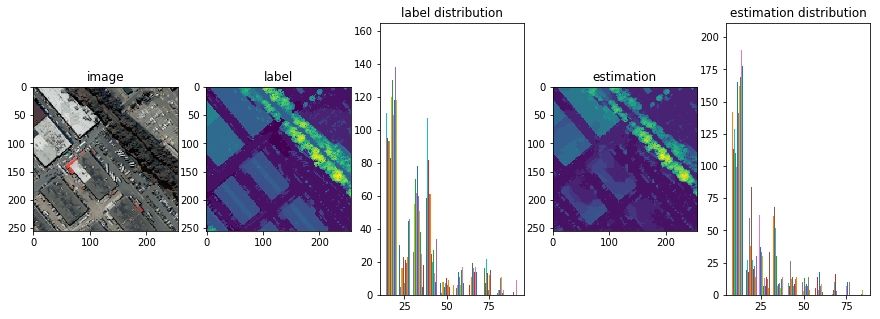

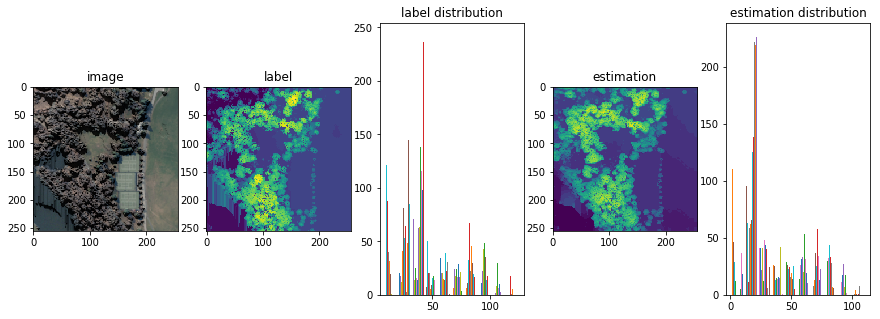

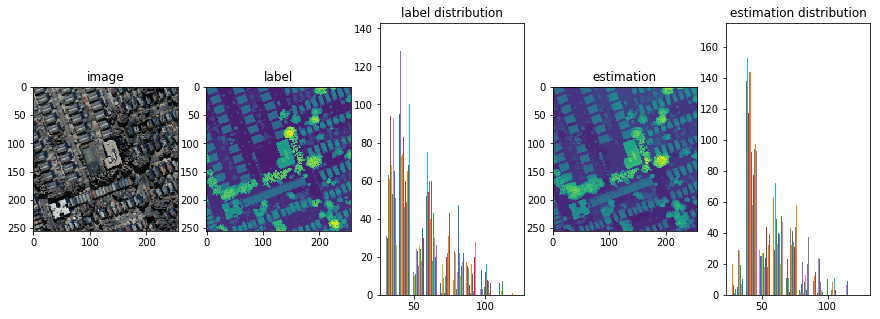

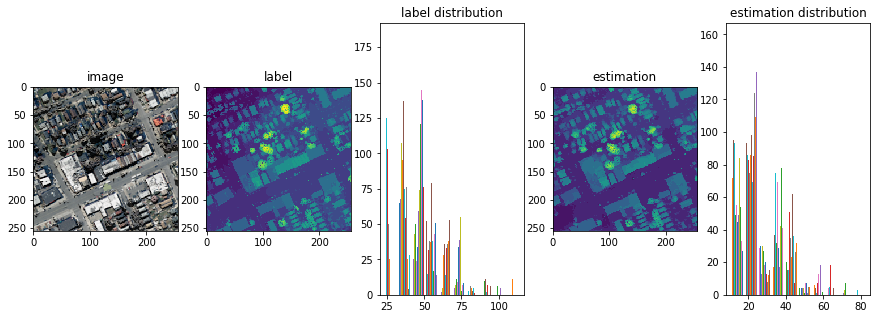

IndexError: index 4 is out of bounds for axis 0 with size 4

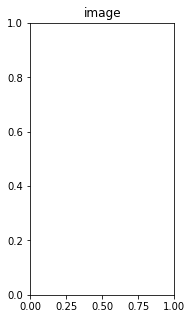

In [6]:
#for i in range(20, 28):
show_estimation_dis(10)

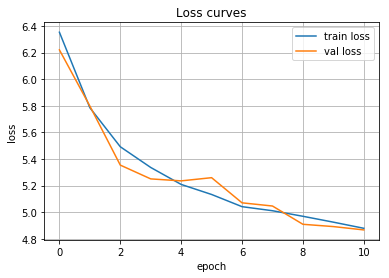

In [5]:
df = pd.read_csv(os.path.join(img_dir, 'loss_regression.csv'))

plt.plot(df['train'], label='train loss')
plt.plot(df['val'], label='val loss')

plt.title('Loss curves')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
#plt.savefig('loss_regression.png')